# Домашнее задание 2 - предобработка признаков, pandas


### О задании

Практическое задание 2 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания получившийся файл \*.ipynb с решением необходимо выложить в свой репозиторий github.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [93]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [94]:
def max_element(arr):
    # элементы, которые следуют сразу за нулём
    if arr.size == 0:
        return None
    shifted = arr[1:]
    mask = arr[:-1] == 0
    candidates = shifted[mask]
    if candidates.size == 0:
        return None
    return candidates.max()

# Тест
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print(max_element(x))  # 5

5


**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [95]:
def nearest_value(X, v):
    return X.flat[np.abs(X - v).argmin()]

X = np.arange(0, 10).reshape((2, 5))
print(nearest_value(X, 3.6))  # 4

4


**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [96]:
def scale(X):
    X_centered = X - X.mean(axis=0)
    std = X.std(axis=0)
    std[std == 0] = 1  
    return X_centered / std

# Тест
np.random.seed(42)
test_matrix = np.random.randint(0, 10, size=(5, 5))
print(test_matrix)
print(scale(test_matrix))

[[6 3 7 4 6]
 [9 2 6 7 4]
 [3 7 7 2 5]
 [4 1 7 5 1]
 [4 0 9 5 8]]
[[ 0.37463432  0.16552118 -0.20412415 -0.36927447  0.51832106]
 [ 1.77951304 -0.24828177 -1.22474487  1.47709789 -0.34554737]
 [-1.03024439  1.82073295 -0.20412415 -1.60018938  0.08638684]
 [-0.56195149 -0.66208471 -0.20412415  0.24618298 -1.64135001]
 [-0.56195149 -1.07588766  1.83711731  0.24618298  1.38218948]]


**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [97]:
def matrix_info(X):
    info = {}
    info['determinant'] = np.linalg.det(X) if X.shape[0] == X.shape[1] else None
    info['trace'] = np.trace(X)
    info['min'] = X.min()
    info['max'] = X.max()
    info['frobenius_norm'] = np.linalg.norm(X, 'fro')
    info['eigenvalues'] = np.linalg.eigvals(X) if X.shape[0] == X.shape[1] else None
    if X.shape[0] == X.shape[1] and np.linalg.matrix_rank(X) == X.shape[0]:
        info['inverse'] = np.linalg.inv(X)
    else:
        info['inverse'] = None
    return info

np.random.seed(42)
test_mat = np.random.randn(4, 4)
print(matrix_info(test_mat))

{'determinant': np.float64(-1.8638200811885155), 'trace': np.float64(-0.7631280259913829), 'min': np.float64(-1.913280244657798), 'max': np.float64(1.5792128155073915), 'frobenius_norm': np.float64(3.7622616923323706), 'eigenvalues': array([ 1.43750501+0.j        , -0.79407997+0.j        ,
       -0.70327653+1.06686096j, -0.70327653-1.06686096j]), 'inverse': array([[-0.33124857, -1.0333483 , -2.21070923, -0.47651024],
       [ 0.12864778, -0.47781825,  0.15271687, -0.43017975],
       [-0.51338817,  0.33588835, -0.8347692 , -0.24072429],
       [ 0.99462192,  0.15079316,  1.08985145,  0.21872535]])}


**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [98]:
def experiment(n=10, trials=100):
    # генерируем батч матриц и перемножаем их без циклов
    A = np.random.randn(trials, n, n)
    B = np.random.randn(trials, n, n)
    C = np.matmul(A, B)
    max_values = C.max(axis=(1, 2))
    mean_max = max_values.mean()
    quantile_95 = np.percentile(max_values, 95)
    return mean_max, quantile_95

mean_max, quantile_95 = experiment()
print(f"Среднее максимальных элементов: {mean_max:.4f}")
print(f"95-процентная квантиль: {quantile_95:.4f}")

Среднее максимальных элементов: 8.4298
95-процентная квантиль: 11.8783


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [99]:
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = pd.read_csv('2008.csv')

**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [100]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler


In [101]:
print("6. Самая частая причина отмены рейса:")
cancellation_counts = df['CancellationCode'].value_counts()
print(cancellation_counts)

most_common_cancellation = cancellation_counts.idxmax()
print(f"   Самая частая причина: {most_common_cancellation} (расшифровка: {'Carrier' if most_common_cancellation == 'A' else 'Weather' if most_common_cancellation == 'B' else 'NAS' if most_common_cancellation == 'C' else 'Security'})")


6. Самая частая причина отмены рейса:
CancellationCode
A    563
B    549
C    299
Name: count, dtype: int64
   Самая частая причина: A (расшифровка: Carrier)


**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [102]:
print("\n7. Статистика по расстоянию (мили):")
print(f"   Среднее: {df['Distance'].mean():.2f}")
print(f"   Минимальное: {df['Distance'].min()}")
print(f"   Максимальное: {df['Distance'].max()}")


7. Статистика по расстоянию (мили):
   Среднее: 724.51
   Минимальное: 31
   Максимальное: 4962


**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [103]:
min_distance = df['Distance'].min()
min_distance_flights = df[df['Distance'] == min_distance]
print(f"\n8. Минимальное расстояние: {min_distance} миль")
print("   Рейсы с таким расстоянием:")
print(f"   Количество таких записей: {len(min_distance_flights)}")
print(f"   Маршруты: {min_distance_flights[['Origin', 'Dest']].drop_duplicates().to_string(index=False)}")
print(f"   Дни (месяц, день месяца, день недели): {min_distance_flights[['Month', 'DayofMonth', 'DayOfWeek']].drop_duplicates().to_string(index=False)}")
print(f"   Номера рейсов: {min_distance_flights[['UniqueCarrier', 'FlightNum']].drop_duplicates().to_string(index=False)}")

# Проверим, какое расстояние было у этих же маршрутов в другие дни
common_routes = min_distance_flights[['Origin', 'Dest']].drop_duplicates()
other_flights_for_route = df.merge(common_routes, on=['Origin', 'Dest'])
other_distances = other_flights_for_route[other_flights_for_route['Distance'] > min_distance]['Distance'].unique()
print(f"   Расстояние на этих маршрутах в другие дни: {sorted(other_distances)[:5]} миль (первые 5 уникальных значений)")


8. Минимальное расстояние: 31 миль
   Рейсы с таким расстоянием:
   Количество таких записей: 6
   Маршруты: Origin Dest
   WRG  PSG
   PSG  WRG
   Дни (месяц, день месяца, день недели):  Month  DayofMonth  DayOfWeek
    12          30          2
    12          26          5
     8          18          1
     3          11          2
     8           9          6
     2          28          4
   Номера рейсов: UniqueCarrier  FlightNum
           AS         65
           AS         64
   Расстояние на этих маршрутах в другие дни: [] миль (первые 5 уникальных значений)


**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [104]:
print("\n9. Аэропорт с наибольшим числом вылетов:")
origin_counts = df['Origin'].value_counts()
top_airport = origin_counts.idxmax()
top_count = origin_counts.iloc[0]
print(f"   Код аэропорта: {top_airport}")
print(f"   Количество вылетов: {top_count}")


9. Аэропорт с наибольшим числом вылетов:
   Код аэропорта: ATL
   Количество вылетов: 4134


**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [105]:
print("\n10. Среднее время полета по аэропортам вылета:")
avg_airtime_by_origin = df.groupby('Origin')['AirTime'].mean().sort_values(ascending=False)
top_airport_airtime = avg_airtime_by_origin.idxmax()
top_airtime_value = avg_airtime_by_origin.iloc[0]
print(f"   Аэропорт с наибольшим средним временем полета: {top_airport_airtime}")
print(f"   Среднее время полета: {top_airtime_value:.2f} минут")


10. Среднее время полета по аэропортам вылета:
   Аэропорт с наибольшим средним временем полета: SJU
   Среднее время полета: 205.20 минут


**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [106]:
print("\n11. Аэропорт с наибольшей долей задержанных рейсов (с фильтром N >= 1000):")
dep_delay_stats = df.groupby('Origin').agg(
    total_flights=('DepDelay', 'count'),
    delayed_flights=('DepDelay', lambda x: (x > 0).sum())
)

dep_delay_stats_filtered = dep_delay_stats[dep_delay_stats['total_flights'] >= 1000]
dep_delay_stats_filtered['delay_rate'] = dep_delay_stats_filtered['delayed_flights'] / dep_delay_stats_filtered['total_flights']
max_delay_airport = dep_delay_stats_filtered['delay_rate'].idxmax()
max_delay_rate = dep_delay_stats_filtered['delay_rate'].max()
print(f"   Аэропорт: {max_delay_airport}")
print(f"   Доля задержанных рейсов: {max_delay_rate:.3f}")
print(f"   Всего рейсов из этого аэропорта: {dep_delay_stats_filtered.loc[max_delay_airport, 'total_flights']}")
print(f"   Задержанных рейсов: {dep_delay_stats_filtered.loc[max_delay_airport, 'delayed_flights']}")


11. Аэропорт с наибольшей долей задержанных рейсов (с фильтром N >= 1000):
   Аэропорт: EWR
   Доля задержанных рейсов: 0.529
   Всего рейсов из этого аэропорта: 1343
   Задержанных рейсов: 710


C:\Users\Елена\AppData\Local\Temp\ipykernel_49912\2381690917.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dep_delay_stats_filtered['delay_rate'] = dep_delay_stats_filtered['delayed_flights'] / dep_delay_stats_filtered['total_flights']


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [107]:
df = pd.read_csv('2008.csv')

print("1. Имеются ли в данных пропущенные значения?", df.isnull().any().any())
print("2. Сколько всего пропущенных элементов в таблице:", df.isnull().sum().sum())
print("3. Сколько объектов имеют хотя бы один пропуск:", df.isnull().any(axis=1).sum())
print("4. Сколько признаков имеют хотя бы одно пропущенное значение:", df.isnull().any(axis=0).sum())

1. Имеются ли в данных пропущенные значения? True
2. Сколько всего пропущенных элементов в таблице: 355215
3. Сколько объектов имеют хотя бы один пропуск: 70000
4. Сколько признаков имеют хотя бы одно пропущенное значение: 16


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [108]:
print("Пропущенные значения в DepDelay:", df['DepDelay'].isnull().sum())

null_depdelay = df[df['DepDelay'].isnull()]
print("\nХарактеристики объектов с пропущенным DepDelay:")
print("Cancelled:", null_depdelay['Cancelled'].value_counts())
print("Diverted:", null_depdelay['Diverted'].value_counts())

print("\nОчистка данных:")
initial_size = len(df)
df_clean = df[df['DepDelay'].notna() & (df['DepDelay'] != 0)].copy()
final_size = len(df_clean)

print(f"Исходный размер: {initial_size}")
print(f"Размер после удаления пропусков и нулевых DepDelay: {final_size}")
print(f"Удалено объектов: {initial_size - final_size}")

y = df_clean['DepDelay']
X = df_clean.drop('DepDelay', axis=1)

print(f"\nРазмерность после очистки:")
print(f"X: {X.shape}")
print(f"y: {y.shape}")

Пропущенные значения в DepDelay: 1399

Характеристики объектов с пропущенным DepDelay:
Cancelled: Cancelled
1    1399
Name: count, dtype: int64
Diverted: Diverted
0    1399
Name: count, dtype: int64

Очистка данных:
Исходный размер: 70000
Размер после удаления пропусков и нулевых DepDelay: 63404
Удалено объектов: 6596

Размерность после очистки:
X: (63404, 28)
y: (63404,)


**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [109]:
time_columns = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']

for col in time_columns:
    X[f'{col}_Hour'] = X[col] // 100
    X[f'{col}_Minute'] = X[col] % 100
    
    mask = (X[col] < 0) | (X[col] > 2359)
    X.loc[mask, f'{col}_Hour'] = np.nan
    X.loc[mask, f'{col}_Minute'] = np.nan
    
    X = X.drop(col, axis=1)

print("Новые признаки:", [col for col in X.columns if 'Hour' in col or 'Minute' in col])

Новые признаки: ['DepTime_Hour', 'DepTime_Minute', 'CRSDepTime_Hour', 'CRSDepTime_Minute', 'ArrTime_Hour', 'ArrTime_Minute', 'CRSArrTime_Hour', 'CRSArrTime_Minute']


**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [110]:
high_correlation_features = ['ArrDelay', 'ActualElapsedTime', 'CRSElapsedTime']
other_excluded = ['TailNum', 'Year', 'CancellationCode']
X = X.drop(high_correlation_features + other_excluded, axis=1, errors='ignore')
print(f"Размерность после исключения признаков: {X.shape}")

Размерность после исключения признаков: (63404, 26)


**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

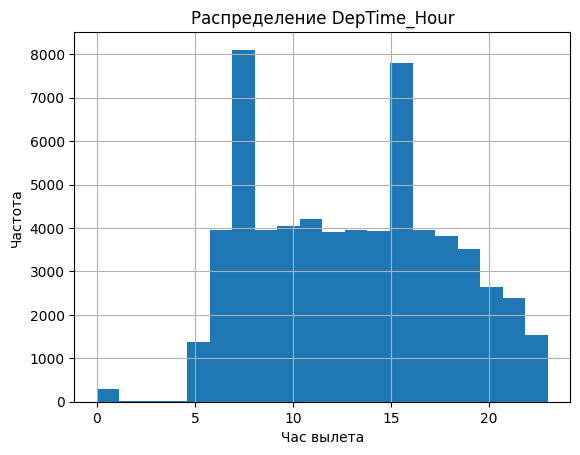

In [111]:
X['DepTime_Hour'].hist(bins=20)
plt.title('Распределение DepTime_Hour')
plt.xlabel('Час вылета')
plt.ylabel('Частота')
plt.show()

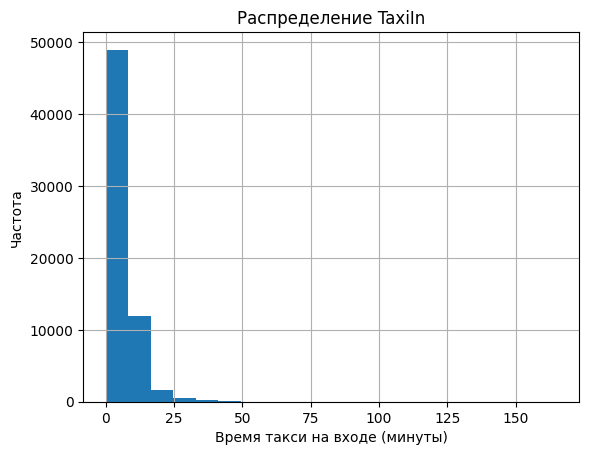

In [112]:
X['TaxiIn'].hist(bins=20)
plt.title('Распределение TaxiIn')
plt.xlabel('Время такси на входе (минуты)')
plt.ylabel('Частота')
plt.show()

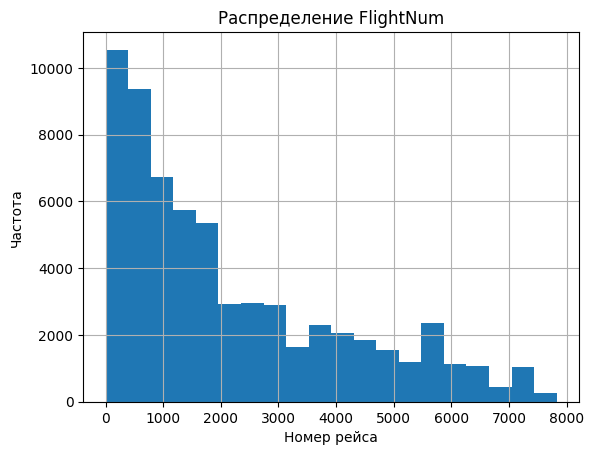

In [113]:
X['FlightNum'].hist(bins=20)
plt.title('Распределение FlightNum')
plt.xlabel('Номер рейса')
plt.ylabel('Частота')
plt.show()

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [114]:
def transform_data(data):
    numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()
    categorical_features = data.select_dtypes(include=['object']).columns.tolist()
    
    data_numeric = data[numeric_features].fillna(0)
    data_categorical = data[categorical_features].fillna('nan')
    
    scaler = StandardScaler()
    scaled_numeric = scaler.fit_transform(data_numeric)
    scaled_numeric_df = pd.DataFrame(scaled_numeric, columns=numeric_features, index=data.index)
    
    categorical_dummies = pd.get_dummies(data_categorical, prefix=categorical_features)
    
    result = pd.concat([scaled_numeric_df, categorical_dummies], axis=1)
    
    return result

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [115]:
X_transformed = transform_data(X)

print(f"Исходное количество признаков: {X.shape[1]}")
print(f"Количество признаков после преобразования: {X_transformed.shape[1]}")
print(f"Размерность данных после преобразования: {X_transformed.shape}")

Исходное количество признаков: 26
Количество признаков после преобразования: 637
Размерность данных после преобразования: (63404, 637)


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.3, random_state=42, shuffle=True
)

print("Размеры после split:")
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)

Размеры после split:
X_train: (44382, 637) y_train: (44382,)
X_test: (19022, 637) y_test: (19022,)


### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [117]:
# обучаем на 1000 объектах из обучающей выборки
subset = X_train.sample(n=1000, random_state=42)
subset_y = y_train.loc[subset.index]

lin_reg = LinearRegression()
lin_reg.fit(subset, subset_y)

train_pred = lin_reg.predict(subset)
test_pred = lin_reg.predict(X_test)

train_mse = mean_squared_error(subset_y, train_pred)
test_mse = mean_squared_error(y_test, test_pred)
train_r2 = r2_score(subset_y, train_pred)
test_r2 = r2_score(y_test, test_pred)

print("Линейная регрессия (1000 объектов):")
print(f"MSE train: {train_mse:.2f}")
print(f"MSE test:  {test_mse:.2f}")
print(f"R^2 train: {train_r2:.3f}")
print(f"R^2 test:  {test_r2:.3f}")

Линейная регрессия (1000 объектов):
MSE train: 45.85
MSE test:  123.83
R^2 train: 0.979
R^2 test:  0.907


Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

In [118]:
def count_nonzero(coefs, tol=1e-4):
    return np.sum(np.abs(coefs) > tol)

lasso = Lasso(alpha=1.0, max_iter=5000)
ridge = Ridge(alpha=1.0)
lasso.fit(subset, subset_y)
ridge.fit(subset, subset_y)

print("Lasso (alpha=1): ненулевых коэффициентов:", count_nonzero(lasso.coef_))
print("Ridge (alpha=1): ненулевых коэффициентов:", count_nonzero(ridge.coef_))

Lasso (alpha=1): ненулевых коэффициентов: 8
Ridge (alpha=1): ненулевых коэффициентов: 346


__18. (1 балл) __ Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

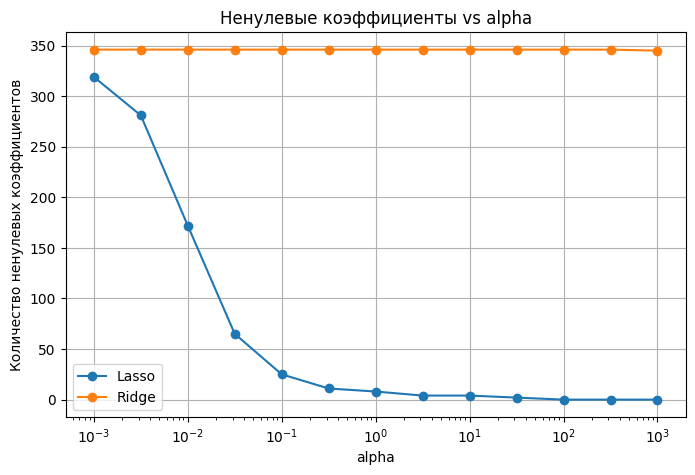

In [119]:
alphas = np.logspace(-3, 3, 13)
lasso_counts = []
ridge_counts = []

for a in alphas:
    l = Lasso(alpha=a, max_iter=5000)
    l.fit(subset, subset_y)
    lasso_counts.append(count_nonzero(l.coef_))
    r = Ridge(alpha=a)
    r.fit(subset, subset_y)
    ridge_counts.append(count_nonzero(r.coef_))

plt.figure(figsize=(8, 5))
plt.semilogx(alphas, lasso_counts, marker='o', label='Lasso')
plt.semilogx(alphas, ridge_counts, marker='o', label='Ridge')
plt.xlabel('alpha')
plt.ylabel('Количество ненулевых коэффициентов')
plt.title('Ненулевые коэффициенты vs alpha')
plt.legend()
plt.grid(True)
plt.show()

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [120]:
ridge_test_pred = ridge.predict(X_test)
# mean_squared_error без squared для старых версий sklearn
mse = mean_squared_error(y_test, ridge_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, ridge_test_pred)
r2 = r2_score(y_test, ridge_test_pred)

print("Ridge (alpha=1) метрики на тесте:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE:  {mae:.2f}")
print(f"R^2:  {r2:.3f}")

Ridge (alpha=1) метрики на тесте:
RMSE: 10.22
MAE:  6.98
R^2:  0.922


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

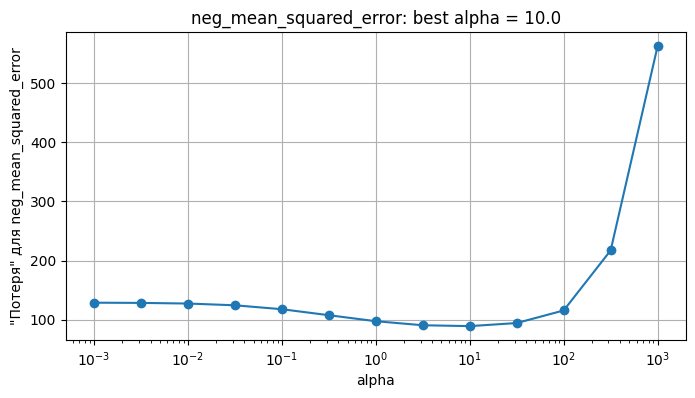

neg_mean_squared_error: best alpha = 10.0


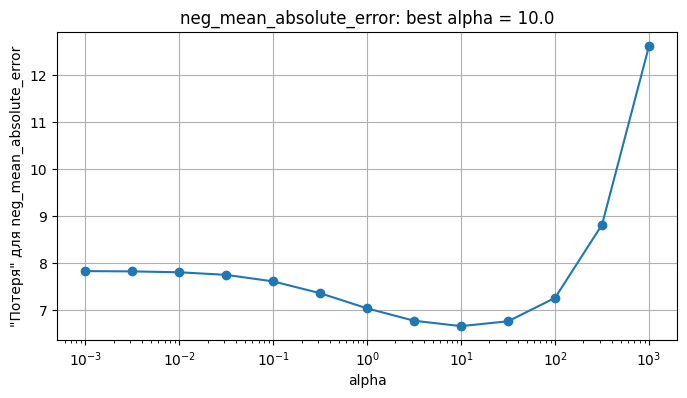

neg_mean_absolute_error: best alpha = 10.0


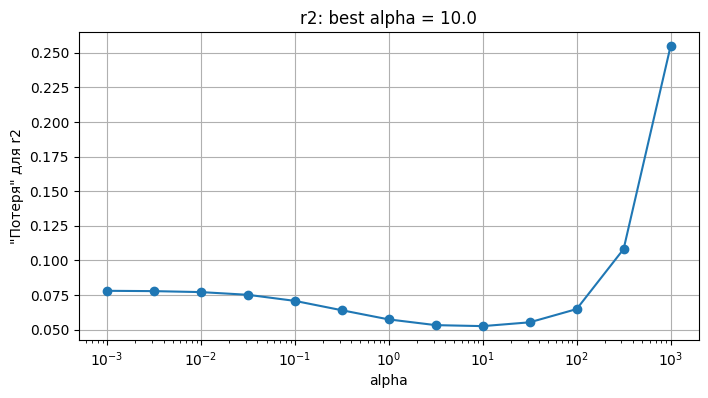

r2: best alpha = 10.0


TypeError: got an unexpected keyword argument 'squared'

In [ ]:
alphas = np.logspace(-3, 3, 13)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results = {}
for metric in ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']:
    gs = GridSearchCV(Ridge(), param_grid={'alpha': alphas}, cv=kf, scoring=metric)
    gs.fit(subset, subset_y)
    results[metric] = gs
    scores = gs.cv_results_['mean_test_score']
    if metric.startswith('neg_'):
        losses = -scores
    else:  # r2
        losses = 1 - scores
    plt.figure(figsize=(8, 4))
    plt.semilogx(alphas, losses, marker='o')
    plt.xlabel('alpha')
    plt.ylabel(f'"Потеря" для {metric}')
    plt.title(f'{metric}: best alpha = {gs.best_params_["alpha"]}')
    plt.grid(True)
    plt.show()
    print(f"{metric}: best alpha = {gs.best_params_['alpha']}")

best_ridge = results['neg_mean_squared_error'].best_estimator_
best_pred = best_ridge.predict(X_test)
# sklearn без параметра squared: считаем RMSE вручную
best_mse = mean_squared_error(y_test, best_pred)
best_rmse = np.sqrt(best_mse)
best_mae = mean_absolute_error(y_test, best_pred)
best_r2 = r2_score(y_test, best_pred)

print("Лучший Ridge по MSE:")
print(f"alpha: {results['neg_mean_squared_error'].best_params_['alpha']}")
print(f"RMSE:  {best_rmse:.2f}")
print(f"MAE:   {best_mae:.2f}")
print(f"R^2:   {best_r2:.3f}")

__19. (0.5 балла)__ Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

In [ ]:
# Out-of-Fold предсказания для поиска выбросов
ridge_oof = best_ridge if 'best_ridge' in globals() else ridge

oof_pred = cross_val_predict(ridge_oof, subset, subset_y, cv=5)
errors = subset_y - oof_pred

plt.figure(figsize=(8, 4))
plt.hist(errors, bins=30, edgecolor='k')
plt.title('Распределение ошибок (OOF)')
plt.xlabel('Ошибка')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

print(f"Средняя ошибка: {errors.mean():.2f}, STD: {errors.std():.2f}, max: {errors.max():.2f}, min: {errors.min():.2f}")
